In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
df=pd.read_csv(r"Mall_Customers.csv")
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [3]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
label_encoder=LabelEncoder()
df['Gender']=label_encoder.fit_transform(df['Gender'])

In [5]:
df['Gender']

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int64

In [6]:
features=['Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

In [7]:
scaler=StandardScaler()
model=scaler.fit(df)
scaled_data=model.transform(df)

In [8]:
scaled_data

array([[-1.7234121 ,  1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.70609137,  1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-1.68877065, -0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-1.67144992, -0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-1.6541292 , -0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-1.63680847, -0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-1.61948775, -0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-1.60216702, -0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [-1.5848463 ,  1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-1.56752558, -0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [-1.55020485,  1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-1.53288413, -0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-1.5155634 , -0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-1.49824268, -0.88640526, -1.0

In [9]:
list=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=400,n_init=10,random_state=42)
    kmeans.fit(scaled_data)
    list.append(kmeans.inertia_)

In [10]:
list

[1000.0,
 715.2750473761118,
 573.8386868500047,
 458.1834192867399,
 389.4085104827474,
 339.74481467362034,
 294.7468731859857,
 254.41521729352561,
 222.67365528284262,
 190.3425217871548]

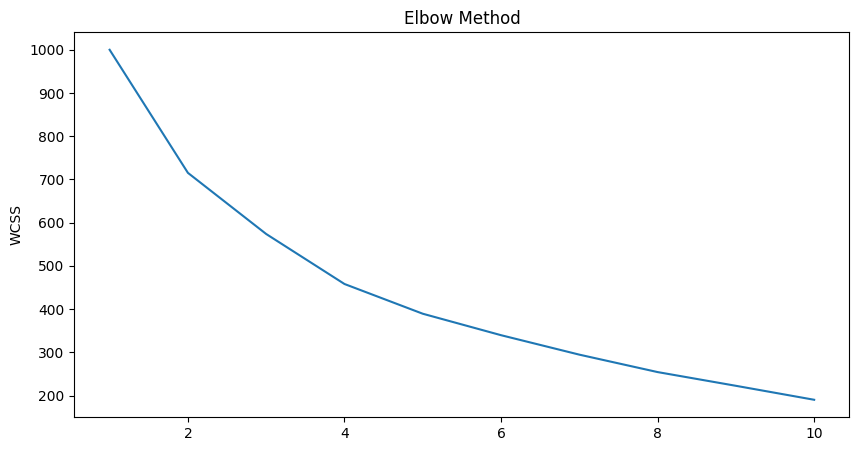

In [11]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11),list)
plt.title("Elbow Method")
plt.ylabel('WCSS')
plt.show()

In [12]:
optimal_clusters=5
kmeans=KMeans(n_clusters=optimal_clusters,init="k-means++",max_iter=300,n_init=10,random_state=42)
df['Cluster']=kmeans.fit_predict(scaled_data)

In [13]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,3
1,2,1,21,15,81,3
2,3,0,20,16,6,3
3,4,0,23,16,77,3
4,5,0,31,17,40,3


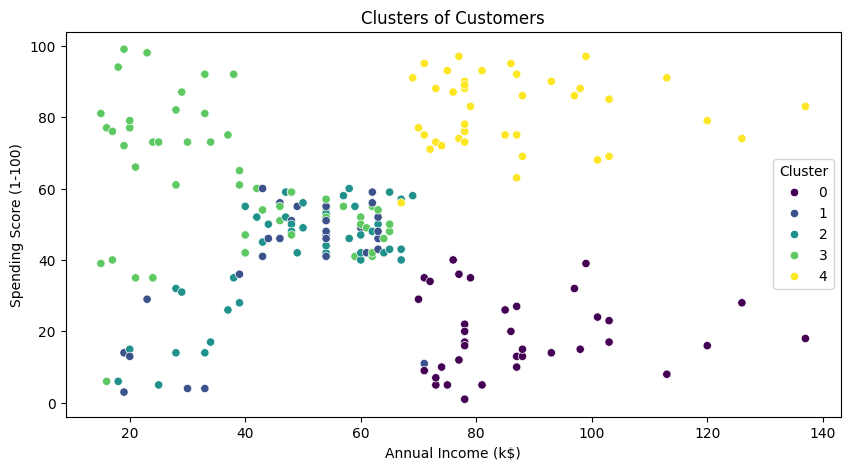

In [14]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [15]:
df.to_csv('clustered_customers.csv', index=False)

In [16]:
# Perform PCA to reduce the dataset to two dimensions
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_data)

In [17]:
# Fit the K-means algorithm to the reduced dataset
kmeans_pca = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters_pca = kmeans_pca.fit_predict(pca_features)

In [25]:
pca_features

array([[-2.31696460e+00, -4.54190250e-01],
       [-2.27239142e+00, -1.47410364e+00],
       [-2.45422326e+00, -6.92224280e-03],
       [-2.38646142e+00, -1.74993499e+00],
       [-2.39737671e+00, -3.69341159e-01],
       [-2.33384641e+00, -1.77165365e+00],
       [-2.38465790e+00,  7.34323845e-01],
       [-2.26899869e+00, -2.20083880e+00],
       [-2.24236580e+00,  2.72650086e+00],
       [-2.25237662e+00, -1.26890988e+00],
       [-2.21493022e+00,  2.58167648e+00],
       [-2.21533483e+00, -1.74129826e+00],
       [-2.30041257e+00,  1.63047026e+00],
       [-2.15909617e+00, -1.69661236e+00],
       [-2.07408068e+00,  1.13078827e+00],
       [-1.97107977e+00, -1.36629670e+00],
       [-2.15658392e+00, -3.46963550e-02],
       [-1.92676987e+00, -1.11769672e+00],
       [-1.96362550e+00,  1.44654871e+00],
       [-2.01105197e+00, -1.71091029e+00],
       [-1.86966723e+00,  4.49730464e-01],
       [-1.80218500e+00, -1.05514163e+00],
       [-2.02630859e+00,  1.31000878e+00],
       [-1.

In [18]:
# Create a mesh grid to plot decision boundaries
x_min, x_max = pca_features[:, 0].min() - 1, pca_features[:, 0].max() + 1
y_min, y_max = pca_features[:, 1].min() - 1, pca_features[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

In [19]:
# Predict the cluster for each point in the mesh grid
Z = kmeans_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

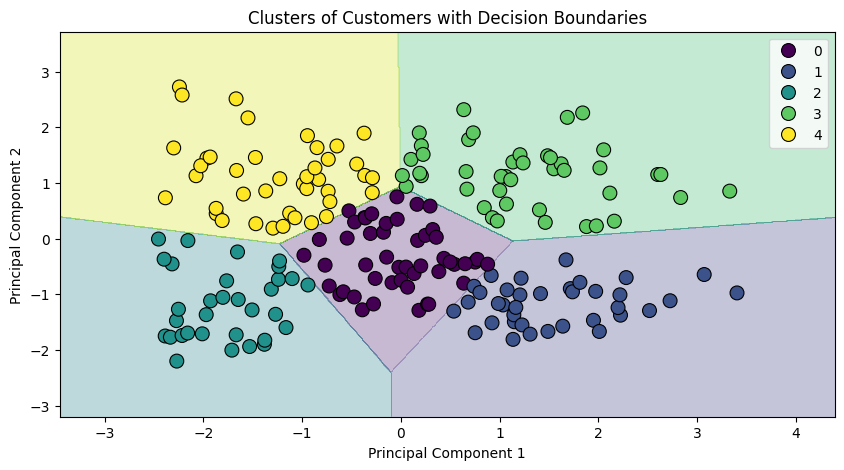

In [20]:
# Plot the decision boundaries and the scatter plot of the clusters
plt.figure(figsize=(10, 5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=clusters_pca, palette='viridis', s=100, edgecolor='k')
plt.title('Clusters of Customers with Decision Boundaries')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
